In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt

In [3]:
d1 = ad.read_h5ad('data/dataseta0.h5ad')
d2 = ad.read_h5ad('data/datasetb0.h5ad')

d1.uns["root"] = d1.uns["iroot"]
d2.uns["root"] = d2.uns["iroot"]

d1.uns["iroot"] = np.flatnonzero(d1.obs_names == d1.uns["iroot"])[0]
d2.uns["iroot"] = np.flatnonzero(d2.obs_names == d2.uns["iroot"])[0]

In [4]:
# remove all cells from d2 from milestone sEndC
d2 = d2[d2.obs["milestones"] != "sEndC", :]
d2.write_h5ad("data/datasetb0_cut.h5ad")

In [8]:
d1.obs

,step_ix,simulation_i,sim_time,milestones,leiden,dpt_pseudotime
cell1,4972,62,150.083333,sD,0,0.183115
cell2,7919,98,460.083333,sD,4,0.616939
cell3,54,1,380.083333,sEndD,4,0.655404
cell4,2870,36,190.000000,sD,0,0.143597
cell5,4848,60,530.083333,sEndC,5,0.933513
...,...,...,...,...,...,...
cell996,5932,74,30.083333,sB,3,0.071835
cell997,285,4,260.000000,sEndC,2,0.723212
cell998,2154,27,320.083333,sC,2,0.691167
cell999,6114,76,230.000000,sD,1,0.268930


In [ ]:
# ds = ds = ad.concat([d1, d2], label = "batch")
# ds.obs_names_make_unique()
# ds.write_h5ad("data/dataset_combined.h5ad")

/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
d1.uns["iroot"], d1.uns["root"], d2.uns["iroot"], d2.uns["root"]

(np.int64(818), 'cell819', np.int64(144), 'cell145')

In [5]:
def preprocess(dataset, root):
    sc.pp.normalize_total(dataset, target_sum=1e4)
    sc.pp.log1p(dataset)
    sc.pp.pca(dataset)
    # sc.pp.scale(dataset)
    sc.pp.neighbors(dataset, n_neighbors=10)
    sc.tl.umap(dataset)
    sc.tl.leiden(dataset)
    sc.tl.paga(dataset)
    # set root as start of cluster root
    dataset.uns["iroot"] = np.flatnonzero(dataset.obs["leiden"] == str(root))[0]
    sc.tl.dpt(dataset)
    return dataset

# Preprocess data

## Preprocess d1

In [6]:
d1 = preprocess(d1, "3")

/tmp/ipykernel_127545/2494168673.py:8: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(dataset)


[<Axes: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'dpt_pseudotime'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'milestones'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'sim_time'}, xlabel='UMAP1', ylabel='UMAP2'>]

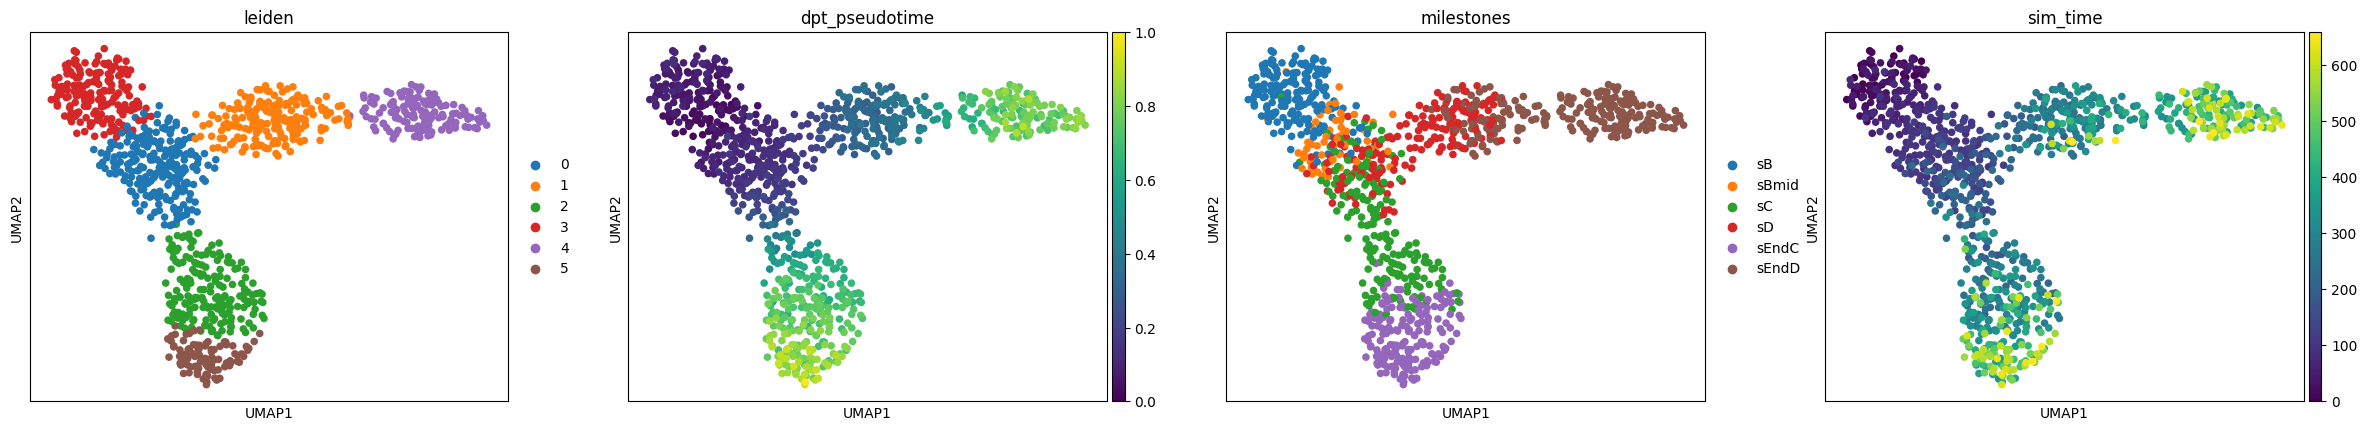

In [9]:
sc.pl.umap(d1, color=["leiden", "dpt_pseudotime", "milestones", "sim_time"], show=False)

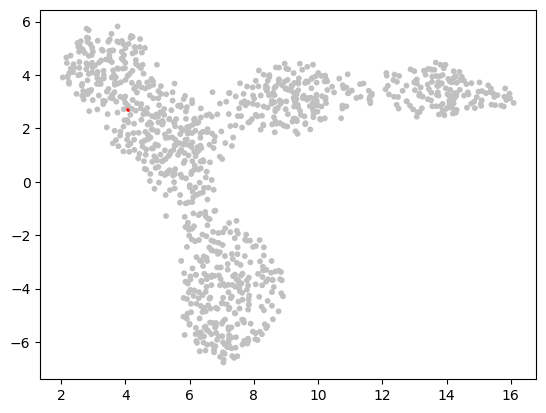

In [9]:
colormap_iroot = np.array(["#C0C0C0"] * d1.n_obs)
colormap_iroot[d1.uns["iroot"]] = "#FF0000"

plt.scatter(
    d1.obsm["X_umap"][:, 0],
    d1.obsm["X_umap"][:, 1],
    c=colormap_iroot,
    s=10,
)

In [10]:
d1.write_h5ad("data/dataseta0_processed.h5ad")

## Preprocess d2

In [11]:
d2 = preprocess(d2, "1")

/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[<Axes: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'dpt_pseudotime'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'milestones'}, xlabel='UMAP1', ylabel='UMAP2'>]

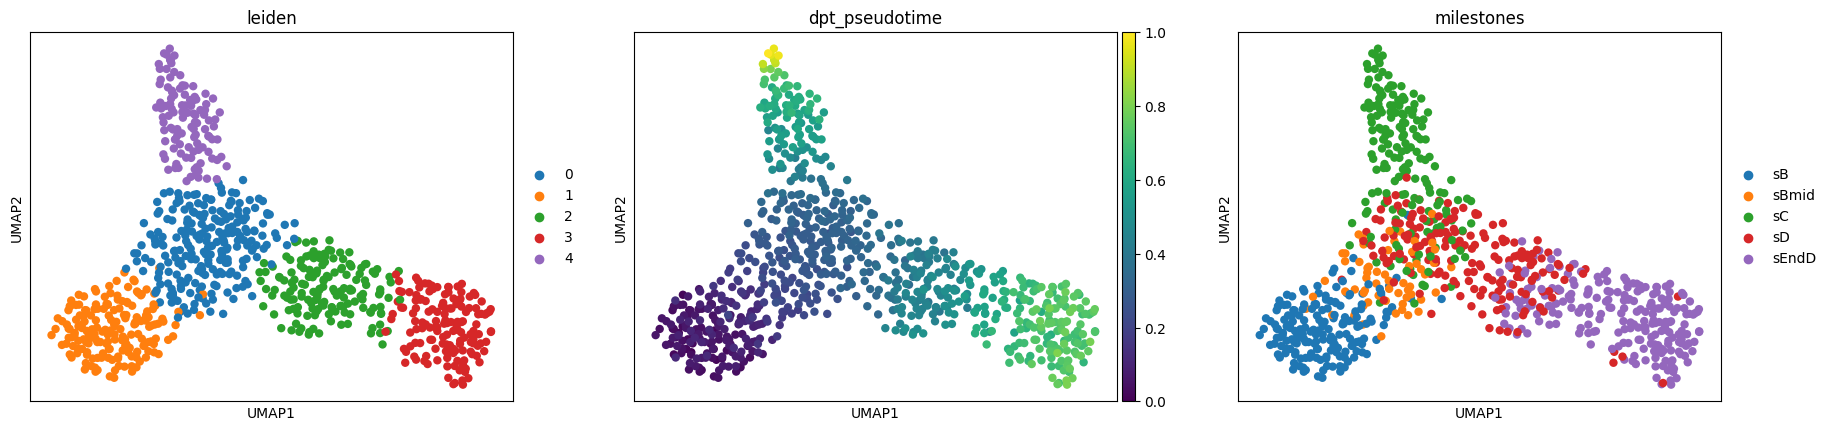

In [12]:
sc.pl.umap(d2, color=["leiden", "dpt_pseudotime", "milestones"], show=False)

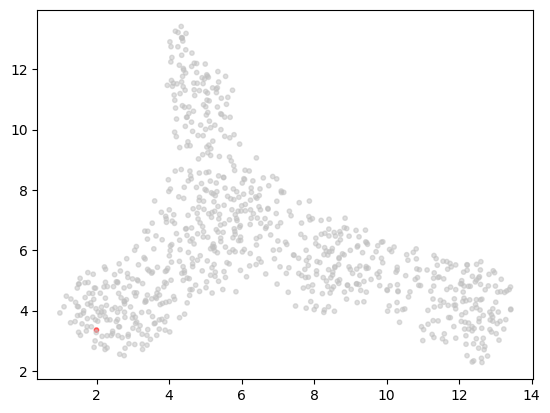

In [13]:
colormap_iroot = np.array(["#C0C0C0"] * d2.n_obs)
colormap_iroot[d2.uns["iroot"]] = "#FF0000"

plt.scatter(
    d2.obsm["X_umap"][:, 0],
    d2.obsm["X_umap"][:, 1],
    c=colormap_iroot,
    s=10,
    alpha=0.5
)

In [14]:
d2.write_h5ad("data/datasetb0_processed.h5ad")

# Select pseudotime

In [10]:
d1 = ad.read_h5ad("data/dynchro1_slingshot.h5ad")
d2 = ad.read_h5ad("data/dynchro2_slingshot.h5ad")

In [11]:
d1, d2

(AnnData object with n_obs × n_vars = 1000 × 531
     obs: 'step_ix', 'simulation_i', 'sim_time', 'milestones', 'leiden', 'dpt_pseudotime', 'slingPseudotime_1', 'slingPseudotime_2'
     var: 'module_id', 'basal', 'burn', 'independence', 'color', 'is_tf', 'is_hk', 'transcription_rate', 'splicing_rate', 'translation_rate', 'mrna_halflife', 'protein_halflife', 'mrna_decay_rate', 'protein_decay_rate', 'max_premrna', 'max_mrna', 'max_protein', 'mol_premrna', 'mol_mrna', 'mol_protein'
     uns: 'diffmap_evals', 'iroot', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'milestones_colors', 'neighbors', 'paga', 'pca', 'root', 'traj_dimred_segments', 'traj_milestone_network', 'traj_progressions', 'umap'
     obsm: 'X_diffmap', 'X_pca', 'X_umap', 'dimred'
     layers: 'X', 'counts_protein', 'counts_spliced', 'counts_unspliced', 'logcounts'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 822 × 531
     obs: 'step_ix', 'simulation_i', 'sim_time', 'milestones', 'l

/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


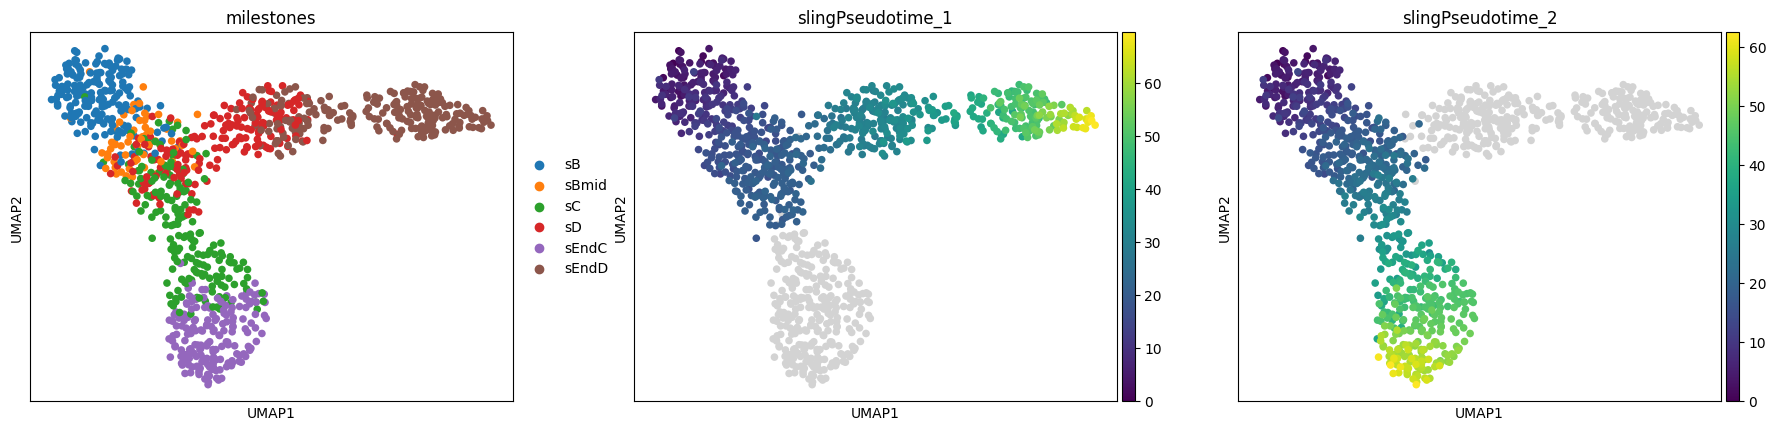

/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


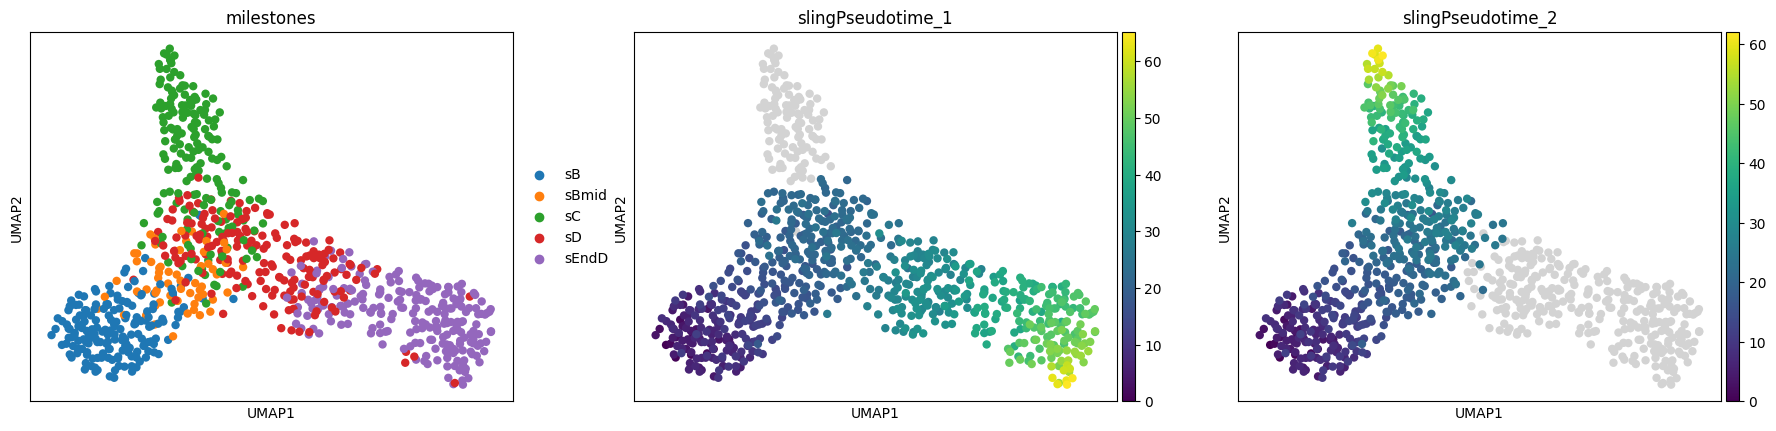

In [14]:
sc.pl.umap(d1, color=["milestones", "slingPseudotime_1", "slingPseudotime_2"])
sc.pl.umap(d2, color=["milestones", "slingPseudotime_1", "slingPseudotime_2"])

In [19]:
# select all cells in slingPseudotime_1 and assign them to linD "TRUE" in obs
d1.obs["linD"] = d1.obs["slingPseudotime_1"].apply(lambda x: "TRUE" if not np.isnan(x) else "FALSE")
d2.obs["linD"] = d2.obs["slingPseudotime_1"].apply(lambda x: "TRUE" if not np.isnan(x) else "FALSE")

# select all cells in slingPseudotime_2 and assign them to linC "TRUE" in obs
d1.obs["linC"] = d1.obs["slingPseudotime_2"].apply(lambda x: "TRUE" if not np.isnan(x) else "FALSE")
d2.obs["linC"] = d2.obs["slingPseudotime_2"].apply(lambda x: "TRUE" if not np.isnan(x) else "FALSE")

d1.obs, d2.obs

(          step_ix  simulation_i    sim_time milestones leiden  dpt_pseudotime  \
 cell1        4972            62  150.083333         sD      0        0.183115   
 cell2        7919            98  460.083333         sD      4        0.616939   
 cell3          54             1  380.083333      sEndD      4        0.655404   
 cell4        2870            36  190.000000         sD      0        0.143597   
 cell5        4848            60  530.083333      sEndC      5        0.933513   
 ...           ...           ...         ...        ...    ...             ...   
 cell996      5932            74   30.083333         sB      3        0.071835   
 cell997       285             4  260.000000      sEndC      2        0.723212   
 cell998      2154            27  320.083333         sC      2        0.691167   
 cell999      6114            76  230.000000         sD      1        0.268930   
 cell1000     2533            32   60.000000         sB      3        0.032732   
 
           sli

In [ ]:
# rename slingPseudotime_1 to orig_linD_pseudotime
d1.obs.rename(columns={"slingPseudotime_1": "orig_linD_pseudotime"}, inplace=True)
d2.obs.rename(columns={"slingPseudotime_1": "orig_linD_pseudotime"}, inplace=True)

# rename slingPseudotime_2 to orig_linC_pseudotime
d1.obs.rename(columns={"slingPseudotime_2": "orig_linC_pseudotime"}, inplace=True)
d2.obs.rename(columns={"slingPseudotime_2": "orig_linC_pseudotime"}, inplace=True)
d1, d2

In [24]:
d1, d2.obs

(AnnData object with n_obs × n_vars = 1000 × 531
     obs: 'step_ix', 'simulation_i', 'sim_time', 'milestones', 'leiden', 'dpt_pseudotime', 'orig_linD_pseudotime', 'orig_linC_pseudotime', 'linD', 'linC'
     var: 'module_id', 'basal', 'burn', 'independence', 'color', 'is_tf', 'is_hk', 'transcription_rate', 'splicing_rate', 'translation_rate', 'mrna_halflife', 'protein_halflife', 'mrna_decay_rate', 'protein_decay_rate', 'max_premrna', 'max_mrna', 'max_protein', 'mol_premrna', 'mol_mrna', 'mol_protein'
     uns: 'diffmap_evals', 'iroot', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'milestones_colors', 'neighbors', 'paga', 'pca', 'root', 'traj_dimred_segments', 'traj_milestone_network', 'traj_progressions', 'umap'
     obsm: 'X_diffmap', 'X_pca', 'X_umap', 'dimred'
     layers: 'X', 'counts_protein', 'counts_spliced', 'counts_unspliced', 'logcounts'
     obsp: 'connectivities', 'distances',
           step_ix  simulation_i    sim_time milestones leiden  dpt_pseudotime  \
 cell1   

In [25]:
d1.write_h5ad("data/dynchro1_slingshot_processed.h5ad")
d2.write_h5ad("data/dynchro2_slingshot_processed.h5ad")

# Combine data

In [18]:
d3 = ad.read_h5ad('data/dataseta0.h5ad')
d4 = ad.read_h5ad('data/datasetb0_cut.h5ad')

# concat
ds = ad.concat([d3, d4], label = "batch")
ds.obs_names_make_unique()

/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


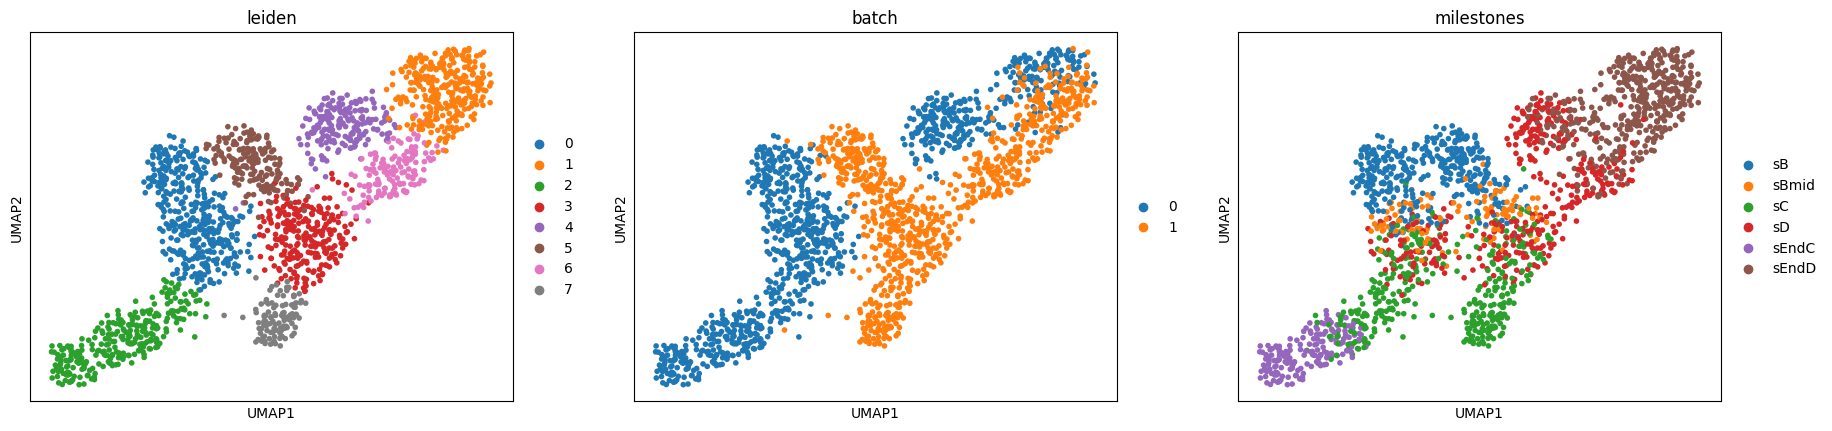

In [19]:
sc.pp.normalize_total(ds)
sc.pp.log1p(ds)
# sc.pp.scale(ds)
sc.pp.pca(ds)
sc.pp.neighbors(ds)
sc.tl.umap(ds)
sc.tl.leiden(ds)
sc.tl.paga(ds)

sc.pl.umap(ds, color=["leiden", "batch", "milestones"])

In [20]:
ds.write_h5ad("data/dataset_combined_processed.h5ad")